# RAID Analysis

### Risks


### Assumptions


### Issues


### Dependencies




# -------------------------------------------------------------------------------

# 1. Importing required libraries and importing the data

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

%matplotlib inline

In [395]:
telecom = pd.read_csv('telecom_churn_data.csv')

In [400]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


# 2. Analysing and Cleaning data

In [397]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [334]:
telecom.loc[:, telecom.dtypes == np.object].head()

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/21/2014,7/16/2014,8/8/2014,NaN
1,NaN,7/25/2014,8/10/2014,NaN
2,NaN,NaN,NaN,9/17/2014
3,NaN,NaN,NaN,NaN
4,6/4/2014,NaN,NaN,NaN


# Replacing empty dates

In [398]:
telecom.last_date_of_month_6.replace(pd.NaT, '6/30/2014', inplace=True)
telecom.last_date_of_month_7.replace(pd.NaT, '7/31/2014', inplace=True)
telecom.last_date_of_month_8.replace(pd.NaT, '8/31/2014', inplace=True)
telecom.last_date_of_month_9.replace(pd.NaT, '9/30/2014', inplace=True)

# Converting Object fields into datetime

In [399]:
telecom['last_date_of_month_6'] = pd.to_datetime(telecom['last_date_of_month_6'], format='%m/%d/%Y')
telecom['last_date_of_month_7'] = pd.to_datetime(telecom['last_date_of_month_7'], format='%m/%d/%Y')
telecom['last_date_of_month_8'] = pd.to_datetime(telecom['last_date_of_month_8'], format='%m/%d/%Y')
telecom['last_date_of_month_9'] = pd.to_datetime(telecom['last_date_of_month_9'], format='%m/%d/%Y')

telecom['date_of_last_rech_6'] = pd.to_datetime(telecom['date_of_last_rech_6'], format='%m/%d/%Y')
telecom['date_of_last_rech_7'] = pd.to_datetime(telecom['date_of_last_rech_7'], format='%m/%d/%Y')
telecom['date_of_last_rech_8'] = pd.to_datetime(telecom['date_of_last_rech_8'], format='%m/%d/%Y')
telecom['date_of_last_rech_9'] = pd.to_datetime(telecom['date_of_last_rech_9'], format='%m/%d/%Y')

telecom['date_of_last_rech_data_6'] = pd.to_datetime(telecom['date_of_last_rech_data_6'], format='%m/%d/%Y')
telecom['date_of_last_rech_data_7'] = pd.to_datetime(telecom['date_of_last_rech_data_7'], format='%m/%d/%Y')
telecom['date_of_last_rech_data_8'] = pd.to_datetime(telecom['date_of_last_rech_data_8'], format='%m/%d/%Y')
telecom['date_of_last_rech_data_9'] = pd.to_datetime(telecom['date_of_last_rech_data_9'], format='%m/%d/%Y')

In [266]:
df = pd.DataFrame(telecom.loc[:, telecom.dtypes == np.float64].var() == 0)
df[df.iloc[:,0] == True]

,0
loc_og_t2o_mou,True
std_og_t2o_mou,True
loc_ic_t2o_mou,True
std_og_t2c_mou_6,True
std_og_t2c_mou_7,True
std_og_t2c_mou_8,True
std_og_t2c_mou_9,True
std_ic_t2o_mou_6,True
std_ic_t2o_mou_7,True
std_ic_t2o_mou_8,True


In [267]:
df = pd.DataFrame(telecom.loc[:, telecom.dtypes == np.int64].var() == 0)
df[df.iloc[:,0] == True]

,0
circle_id,True


In [419]:
df = pd.DataFrame(telecom.loc[:, telecom.dtypes == np.datetime64].var() == 0)
df[df.iloc[:,0] == True]

,0


# Checking for unique values in the Last_Date_Of_Month field, to find the variance in the data.

In [434]:
print('last date mth-6 ->', telecom.last_date_of_month_6.unique())
print('last date mth-7 ->', telecom.last_date_of_month_7.unique())
print('last date mth-8 ->', telecom.last_date_of_month_8.unique())
print('last date mth-9 ->', telecom.last_date_of_month_9.unique())

last date mth-6 -> ['2014-06-30T00:00:00.000000000']
last date mth-7 -> ['2014-07-31T00:00:00.000000000']
last date mth-8 -> ['2014-08-31T00:00:00.000000000']
last date mth-9 -> ['2014-09-30T00:00:00.000000000']


### Since there is only 1 value in each of the above 4 fields we can remove it.

# ---------- rough work

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


# Selecting 'high-value customers' with recharge >= 70 percentile of the entire data set 

In [269]:
#telecom = telecom.dropna(axis=0)
#len(telecom)

In [304]:
a70 = (telecom.arpu_6 + telecom.arpu_7).quantile(0.7)
print(a70)

634.6185999999997


In [435]:
telecom_hvc = telecom[(telecom.arpu_6 +  telecom.arpu_7) >= a70]
len(telecom_hvc)

30000

In [272]:
telecom_hvc = telecom_hvc.drop(['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'spl_og_mou_9', 'og_others_6', 'og_others_7', 'og_others_8', 'og_others_9', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis=1)

In [273]:
round(100*(telecom_hvc.isnull().sum()/len(telecom_hvc.index)), 2)

mobile_number       0.00
arpu_6              0.00
arpu_7              0.00
arpu_8              0.00
arpu_9              0.00
loc_og_t2c_mou_6    1.08
loc_og_t2c_mou_7    1.07
loc_og_t2c_mou_8    3.29
loc_og_t2c_mou_9    5.74
total_og_mou_6      0.00
total_og_mou_7      0.00
total_og_mou_8      0.00
total_og_mou_9      0.00
total_ic_mou_6      0.00
total_ic_mou_7      0.00
total_ic_mou_8      0.00
total_ic_mou_9      0.00
total_rech_num_6    0.00
total_rech_num_7    0.00
total_rech_num_8    0.00
total_rech_num_9    0.00
total_rech_amt_6    0.00
total_rech_amt_7    0.00
total_rech_amt_8    0.00
total_rech_amt_9    0.00
vol_2g_mb_6         0.00
vol_2g_mb_7         0.00
vol_2g_mb_8         0.00
vol_2g_mb_9         0.00
vol_3g_mb_6         0.00
vol_3g_mb_7         0.00
vol_3g_mb_8         0.00
vol_3g_mb_9         0.00
aon                 0.00
dtype: float64

# -----------------------------------

# Finding customers that have churned

In [437]:
telecom_hvc['churn'] = np.where(((telecom_hvc.total_ic_mou_9 == 0) & \
                                 (telecom_hvc.total_og_mou_9 == 0) & \
                                 (telecom_hvc.vol_2g_mb_9 == 0) & \
                                 (telecom_hvc.vol_3g_mb_9 == 0) \
                                ),
                                1, 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [438]:
telecom_hvc['churn'].value_counts()

0    27348
1     2652
Name: churn, dtype: int64

# -----------------------------------

In [221]:
telecom_hvc.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,aon
count,3.346100e+04,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000,33461.000000
mean,7.001230e+09,534.856424,543.847298,512.629819,478.179761,1.532517,1.811248,1.762743,1.474146,622.872622,654.160279,599.037389,550.384845,297.861938,308.695006,297.204869,283.784355,11.456472,11.469651,10.184095,9.854756,634.430232,642.346852,589.801859,555.838917,77.651037,77.182243,70.356878,64.207791,226.437717,248.644056,249.825718,254.431413,1292.898180
std,6.804647e+05,407.931336,431.719210,462.829293,464.325555,6.693350,8.733427,7.568428,6.238506,616.347412,646.344436,652.241062,622.660864,352.167965,364.770793,354.665724,352.838141,8.947245,9.152635,9.168392,8.783744,499.726677,522.410310,566.076991,547.038910,273.574248,275.092169,265.867834,245.204647,735.639525,766.594272,780.388316,807.439825,982.213302
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000
25%,7.000654e+09,324.160000,326.885000,279.171000,245.620000,0.000000,0.000000,0.000000,0.000000,237.530000,253.080000,193.790000,159.690000,89.490000,100.360000,88.230000,78.610000,6.000000,6.000000,4.000000,4.000000,380.000000,380.000000,302.000000,268.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,486.000000
50%,7.001244e+09,445.101000,449.236000,424.017000,395.620000,0.000000,0.000000,0.000000,0.000000,453.610000,473.480000,415.260000,373.960000,199.180000,206.360000,195.790000,183.310000,9.000000,9.000000,8.000000,7.000000,526.000000,527.000000,492.000000,457.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,948.000000
75%,7.001814e+09,642.019000,648.280000,635.904000,606.759000,0.000000,0.060000,0.100000,0.000000,804.490000,848.430000,787.540000,723.460000,379.910000,385.460000,375.590000,361.530000,14.000000,14.000000,13.000000,12.000000,760.000000,770.000000,750.000000,716.000000,12.510000,13.720000,10.680000,7.880000,0.000000,0.000000,0.000000,0.000000,1991.000000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,38805.617000,342.860000,569.710000,351.830000,274.890000,10674.030000,11365.310000,14043.060000,11140.110000,7716.140000,9699.010000,6256.380000,9923.180000,307.000000,138.000000,138.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,10285.900000,7873.550000,11117.610000,8993.950000,26826.130000,28144.120000,29651.830000,26857.040000,4321.000000


In [323]:
telecom[['loc_og_t2c_mou_6', 'total_og_mou_6', 'loc_og_t2c_mou_7', 'total_og_mou_7', 'loc_og_t2c_mou_8', 'total_og_mou_8', 'std_og_t2c_mou_9', 'total_og_mou_9']].head()

,loc_og_t2c_mou_6,total_og_mou_6,loc_og_t2c_mou_7,total_og_mou_7,loc_og_t2c_mou_8,total_og_mou_8,std_og_t2c_mou_9,total_og_mou_9
0,NaN,0.00,NaN,0.00,0.00,0.00,NaN,0.00
1,0.0,40.31,2.91,178.53,0.00,312.44,0.0,72.11
2,0.0,155.33,135.54,412.94,45.76,285.46,0.0,124.94
3,0.0,223.23,0.00,135.31,0.00,352.21,0.0,362.54
4,0.0,127.28,0.00,241.33,0.00,208.16,0.0,104.59


# ----------------------------------------------------------------------------

# 2. Data Analysis & EDA

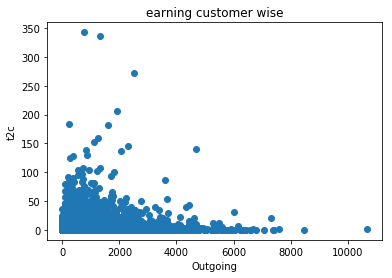

In [316]:
plt.scatter(telecom_hvc['total_og_mou_6'], telecom_hvc['loc_og_t2c_mou_6'])
plt.title('earning customer wise')
plt.xlabel('Outgoing')
plt.ylabel('t2c')
plt.show()

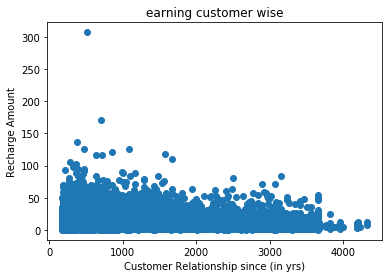

In [312]:
plt.scatter(telecom_hvc['aon'], telecom_hvc['total_rech_num_6'])
plt.title('earning customer wise')
plt.xlabel('Customer Relationship since (in yrs)')
plt.ylabel('Recharge Amount')
plt.show()

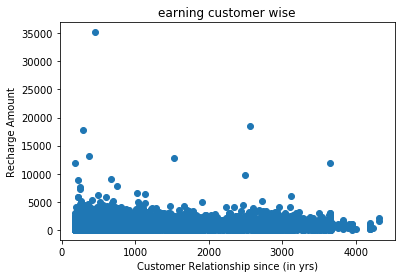

In [313]:
plt.scatter(telecom_hvc['aon'], telecom_hvc['total_rech_amt_6'])
plt.title('earning customer wise')
plt.xlabel('Customer Relationship since (in yrs)')
plt.ylabel('Recharge Amount')
plt.show()

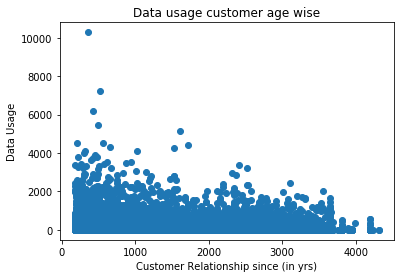

In [295]:
plt.scatter(telecom_hvc['aon'], telecom_hvc['vol_2g_mb_6'])
plt.title('Data usage customer age wise')
plt.xlabel('Customer Relationship since (in yrs)')
plt.ylabel('Data Usage')
plt.show()

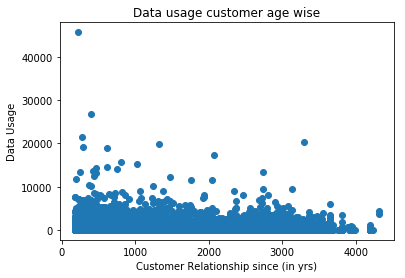

In [294]:
plt.scatter(telecom_hvc['aon'], telecom_hvc['vol_3g_mb_6'])
plt.title('Data usage customer age wise')
plt.xlabel('Customer Relationship since (in yrs)')
plt.ylabel('Data Usage')
plt.show()

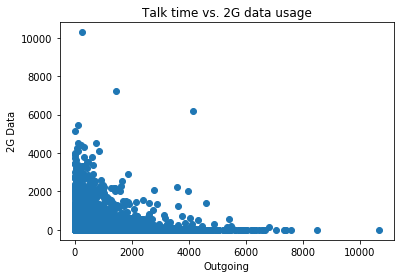

In [290]:
plt.scatter(telecom_hvc['total_og_mou_6'], telecom_hvc['vol_2g_mb_6'])
plt.title('Talk time vs. 2G data usage')
plt.xlabel('Outgoing')
plt.ylabel('2G Data')
plt.show()

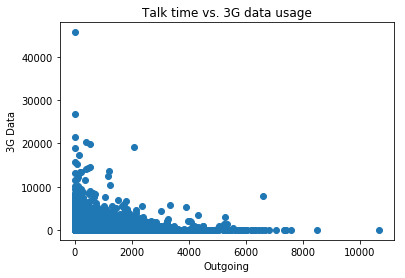

In [291]:
plt.scatter(telecom_hvc['total_og_mou_6'], telecom_hvc['vol_3g_mb_6'])
plt.title('Talk time vs. 3G data usage')
plt.xlabel('Outgoing')
plt.ylabel('3G Data')
plt.show()

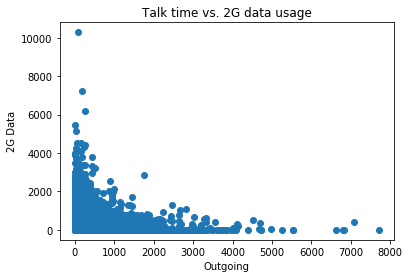

In [293]:
plt.scatter(telecom_hvc['total_ic_mou_6'], telecom_hvc['vol_2g_mb_6'])
plt.title('Talk time vs. 2G data usage')
plt.xlabel('Outgoing')
plt.ylabel('2G Data')
plt.show()

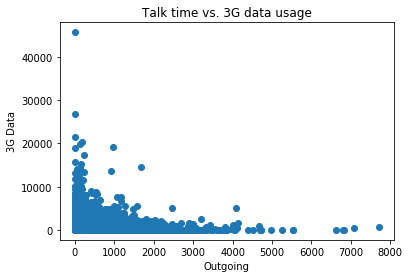

In [292]:
plt.scatter(telecom_hvc['total_ic_mou_6'], telecom_hvc['vol_3g_mb_6'])
plt.title('Talk time vs. 3G data usage')
plt.xlabel('Outgoing')
plt.ylabel('3G Data')
plt.show()

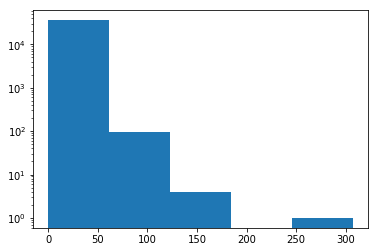

In [281]:
plt.hist(telecom_hvc['total_rech_num_6'], bins=5)
plt.yscale('log')

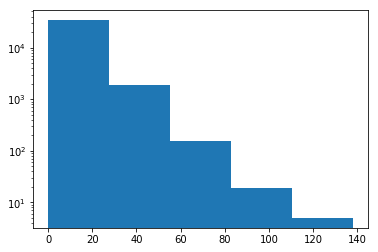

In [282]:
plt.hist(telecom_hvc['total_rech_num_7'], bins=5)
plt.yscale('log')

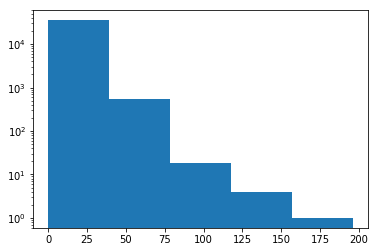

In [283]:
plt.hist(telecom_hvc['total_rech_num_8'], bins=5)
plt.yscale('log')

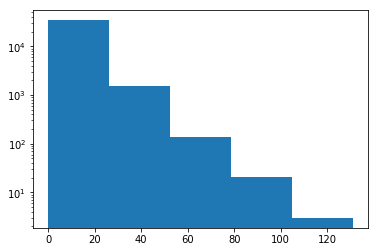

In [284]:
plt.hist(telecom_hvc['total_rech_num_9'], bins=5)
plt.yscale('log')

# 3. PCA

# 4. Model Building

# 5. Model Evaluation